In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [2]:
### 심화문제

In [6]:
#1번
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#1-a 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width), 꽃받침길이(petal_length), 꽃받침폭(petal_width)의 평균, 표준편차 등 기초통계량(describe())을 구하시오
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
#1-a 교수님꺼
iris.groupby(iris.species).agg(['mean','std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

In [5]:
# 평균
iris.groupby('species')[['sepal_length','sepal_width','petal_length','petal_width']].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [6]:
# 표준편차
iris.groupby('species')[['sepal_length','sepal_width','petal_length','petal_width']].std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [98]:
#1-b. 3분위수(Q3)와 1분위수(Q1)의 차이보다 1.5
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [27,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    return np.where((data > upper_bound) | (data<lower_bound))

In [67]:
#1-B 교수님꺼 정답
def get_new_stat(x): #시리즈로 받음  각각 50개짜리 
    q1 = x.quantile(.25) #새로운 스텟을 줌 (.25)는 1분위 25%
    q3 = x.quantile(.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    higher = q3 + 1.5 *iqr
    x[(x > higher) | (x < lower)] = np.nan
    outliers = x.value_counts().sum() != 50 
    # value_counts()를 더한값(sum)이 50이 아니라면 true, 맞다면 fales 트루
    return outlier, x.mean(), x.std()

In [107]:
s_sl = iris[iris.species == 'setosa']['sepal_length']
type(s_sl) #시리즈인지 아닌지 확인

pandas.core.series.Series

In [108]:
def get_outlier(x):
    q1 = x.quantile(0.25) #quantile: 백분위수
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower  = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    x[(x < lower) | (x > upper)] = np.nan
    # outlier = x.value_counts().sum() != 50 
    outlier = x.isnull().sum() != 0  # 위에 있는 것보다 이게 더 좋다
    # value_counts()를 더한값(sum)이 50이 아니라면 true, 맞다면 fales
    return outlier, x.mean(), x.std()

In [104]:
species = []
columns = []
outlier_list = []
mean_list = []
std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for sci in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
        s = iris[iris.species == spec][sci]
        outlier, new_mean, new_std = get_outlier(s)

        species.append(spec)
        columns.append(sci)
        outlier_list.append(outlier)
        mean_list.append(new_mean)
        std_list.append(new_std)

In [106]:
tmp_iris = pd.DataFrame({
    'species': species,
    'versicolor': columns,
    'outlier': outlier_list,
    'new_mean': mean_list,
    'new_std': std_list
})
new_iris = tmp_iris.set_index(['species', 'versicolor'])
new_iris

outlier  new_mean   new_std
species    versicolor                               
setosa     sepal_length    False  5.006000  0.352490
           sepal_width      True  3.431250  0.320343
           petal_length     True  1.460870  0.129062
           petal_width      True  0.233333  0.085883
versicolor sepal_length    False  5.936000  0.516171
           sepal_width     False  2.770000  0.313798
           petal_length     True  4.285714  0.437798
           petal_width     False  1.326000  0.197753
virginica  sepal_length     True  6.622449  0.593459
           sepal_width      True  2.955319  0.260275
           petal_length    False  5.552000  0.551895
           petal_width     False  2.026000  0.274650

In [108]:
old_mean_list = []; old_std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        s = iris[iris.species == spec][wl]
        #print(f'{spec} {wl}: {s.mean().round(3)}, {s.std().round(3)}')
        old_mean_list.append(s.mean())
        old_std_list.append(s.std())

In [109]:
new_iris['old_mean'] = old_mean_list
new_iris['old_std'] = old_std_list
new_iris

outlier  new_mean   new_std  old_mean   old_std
species    versicolor                                                   
setosa     sepal_length    False  5.006000  0.352490     5.006  0.352490
           sepal_width      True  3.431250  0.320343     3.428  0.379064
           petal_length     True  1.460870  0.129062     1.462  0.173664
           petal_width      True  0.233333  0.085883     0.246  0.105386
versicolor sepal_length    False  5.936000  0.516171     5.936  0.516171
           sepal_width     False  2.770000  0.313798     2.770  0.313798
           petal_length     True  4.285714  0.437798     4.260  0.469911
           petal_width     False  1.326000  0.197753     1.326  0.197753
virginica  sepal_length     True  6.622449  0.593459     6.588  0.635880
           sepal_width      True  2.955319  0.260275     2.974  0.322497
           petal_length    False  5.552000  0.551895     5.552  0.551895
           petal_width     False  2.026000  0.274650     2.026  0.274650

In [2]:
#2번
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
#2-a
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >=20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [3]:
#2-b 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값이 되도록 titanic 데이터프레임을 고치시오
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [54]:
# 2-c 강사님
# 'alive :범주형 -> survived: 정수형
titanic.pivot_table('survived','sex')

,survived
sex,
female,0.742038
male,0.188908


In [3]:
# 2-c 강사님
titanic[['sex','survived']].groupby(['sex']).mean().style.background_gradient(cmap='summer_r')

,survived
sex,
female,0.742038
male,0.188908


In [78]:
# 2-c 성별, 선실(class)별, 출발지(embark_town)별 생존율을 구하시오
titanic.groupby(['sex'])[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [4]:
# 2-c 강사님/ 선실(class)별 생존율
titanic.pivot_table('survived', 'class')

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [79]:
# 선실(class)별 생존율
titanic.groupby(['class'])[['survived']].mean()

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [5]:
# 2-c 강사님/ 출발지(embark_town)별 생존율
titanic.pivot_table('survived', 'embark_town')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [6]:
# 출발지(embark_town)별 생존율
titanic.groupby(['embark_town'])[['survived']].mean()

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [7]:
# 2-c 강사님 /성별, 클레스별 생존율?
titanic.pivot_table('survived', ['sex','class'])

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [11]:
# # 2-c 강사님
pd.crosstab([titanic.sex, titanic.survived], titanic.pclass, margins=True)

pclass             1    2    3  All
sex    survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [12]:
# # 2-c 강사님
pd.crosstab([titanic.sex, titanic.survived], titanic.pclass,margins=True).style.background_gradient(cmap='RdPu')

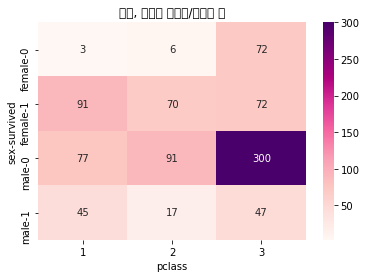

In [9]:
tsdf = pd.crosstab([titanic.sex, titanic.survived], titanic.pclass)
sns.heatmap(tsdf, cmap='RdPu', annot=True, fmt="d")
plt.title("성별, 선실별 생존자/사망자 수")
plt.show()

In [13]:
# 2-d 강사님
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
titanic["age_cat"] = pd.cut(titanic.age, bins, labels=labels)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,청년
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,미성년자
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,청년
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,중년


In [14]:
#2-d 타이타닉호 승객을 ‘미성년자’, ‘청년’, ‘중년’, ‘장년’, ‘노년’ 나이 그룹으로 나누고, 각 그룹별 생존율을 구하시오
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(titanic.age, bins, labels=labels)
cats

0        청년
1        중년
2        청년
3        중년
4        중년
       ... 
886      청년
887    미성년자
888      청년
889      청년
890      중년
Name: age, Length: 891, dtype: category
Categories (5, object): [미성년자 < 청년 < 중년 < 장년 < 노년]

In [15]:
titanic['age_cat'] = pd.DataFrame(titanic.age, columns=['age'])
titanic["age_cat"] = pd.cut(titanic.age, bins,labels=labels)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cat
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,중년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,청년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,청년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,미성년자
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,청년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,청년


In [14]:
# 2-d 강사님
titanic.pivot_table('survived', 'age_cat')

,survived
age_cat,
미성년자,0.424242
청년,0.365217
중년,0.423237
장년,0.355932
노년,0.200000


In [60]:
# 2-d
titanic.groupby(['age_cat'])[['survived']].mean()

,survived
age_cat,
미성년자,0.424242
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


In [19]:
# 2-e qcut 명령으로 세 개의 나이 그룹을 만들고, 나이 그룹별 남녀 성비와 생존율을 구하시오
bins = [1, 50, 100]
labels = ["미성년자", "중년", "노년"]
cats = pd.qcut(bins, 3, labels=labels)
cats

[미성년자, 중년, 노년]
Categories (3, object): [미성년자 < 중년 < 노년]

In [20]:
ti1 = pd.DataFrame(titanic.age, columns=['age'])
ti1['age_cat1'] = pd.qcut(ti1.age, 3, labels=labels)
ti1

,age,age_cat1
0,22.0,미성년자
1,38.0,노년
2,26.0,중년
3,35.0,노년
4,35.0,노년
...,...,...
886,27.0,중년
887,19.0,미성년자
888,NaN,NaN
889,26.0,중년


In [15]:
# 2-e 강사님/
titanic['age_group'] = pd.qcut(titanic.age, 3, labels=["A1", "A2", "A3"])
titanic.tail() # tail: 하위 5줄 출력

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,age_group
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,청년,A2
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,미성년자,A1
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,청년,A2
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,중년,A2


In [37]:
titanic['age_cat1'] = pd.DataFrame(titanic.age, columns=['age'])
titanic['age_cat1'] = pd.qcut(titanic.age, 3, labels=labels)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,age_group,age_cat1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,청년,A2,중년
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,미성년자,A1,미성년자
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,청년,A2,중년
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,중년,A2,중년


In [24]:
# 강사님
titanic.pivot_table('survived', 'age_group')

,survived
age_group,
A1,0.418699
A2,0.400862
A3,0.398305


In [23]:
titanic.groupby(['age_cat1',])[['survived']].mean()

,survived
age_cat1,
미성년자,0.418699
중년,0.400862
노년,0.398305


In [47]:
# 강사님
# gender: 남성이면 1, 여성이면 0
titanic['gender'] = titanic.apply(lambda r: 1 if r.sex == 'male' else 0, axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,age_group,age_cat1,gender
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,청년,A2,중년,1
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,미성년자,A1,미성년자,0
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,NaN,0
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,청년,A2,중년,1
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,중년,A2,중년,1


In [48]:
# 강사님
titanic.pivot_table('gender', 'age_group')

,gender
age_group,
A1,0.589431
A2,0.659483
A3,0.656780


In [58]:
# 강사님
titanic.pivot_table(['survived','gender'], 'age_group')

,gender,survived
age_group,,
A1,0.589431,0.418699
A2,0.659483,0.400862
A3,0.656780,0.398305


In [59]:
# 강사님
titanic[['age_group','survived','gender']].groupby(['age_group']).mean()

,survived,gender
age_group,,
A1,0.418699,0.589431
A2,0.400862,0.659483
A3,0.398305,0.656780


In [64]:
#2-e
titanic.groupby(['age_cat1','sex'])[['sex','survived']].mean()

survived
age_cat1 sex             
미성년자     female  0.702970
         male    0.220690
중년       female  0.772152
         male    0.209150
노년       female  0.802469
         male    0.187097

In [10]:
#3번 
import seaborn as sns
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [67]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
#3-a 배기량(displacement) 대비 마력(horsepower) 열(hp_per_cc)을 추가하시오.
mpg['hp_per_cc'] =  mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576


In [13]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0.614286
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,0.536082
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0.622222
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0.658333


In [14]:
# 3-b  name으로부터 manufacturer(제조사)와 모델을 추출하여 새로운 열 manufacturer와 model을 추가하고, name 열은 삭제하시오
a = mpg['name'].str.split(' ')
manufacturer = a.str[0]
modela = a.str[1]
modelb = a.str[2]
model = modela+modelb

mpg['manufacturer'] = manufacturer
mpg['model'] = model.fillna('')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453,chevrolet,chevellemalibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429,buick,skylark320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698,plymouth,
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421,amc,rebelsst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576,ford,
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0.614286,ford,mustanggl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,0.536082,vw,
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0.622222,dodge,
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0.658333,ford,


In [71]:
del mpg['name']
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevellemalibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebelsst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,0.614286,ford,mustanggl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,0.536082,vw,
395,32.0,4,135.0,84.0,2295,11.6,82,usa,0.622222,dodge,
396,28.0,4,120.0,79.0,2625,18.6,82,usa,0.658333,ford,


In [77]:
# 강사님
mpg[['cylinders','mpg']].groupby('cylinders').mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [78]:
# 강사님
# 아래와 같이 pivot_table을 사용해서 구할 수 있음
mpg.pivot_table('mpg','cylinders')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [72]:
#3-c 엔진의 실린더(cylinders) 갯수별 연비(mpg)의 평균을 구하시오
mpg.groupby(['cylinders'])[['mpg']].mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [79]:
# 강사님
mpg[['origin','hp_per_cc']].groupby('origin').mean()

,hp_per_cc
origin,
europe,0.740005
japan,0.789485
usa,0.512063


In [73]:
#3-d 생산지(origin)별 배기량 대비 마력(hp_per_cc)의 평균을 구하시오
mpg.groupby(['origin'])[['hp_per_cc']].mean()

,hp_per_cc
origin,
europe,0.740005
japan,0.789485
usa,0.512063


In [80]:
#3-e 강사님
mpg.manufacturer.value_counts()

ford             51
chevrolet        43
plymouth         31
dodge            28
amc              28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
volvo             6
vw                6
chrysler          6
renault           5
subaru            4
opel              4
saab              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
chevroelt         1
toyouta           1
triumph           1
hi                1
vokswagen         1
mercedes          1
capri             1
nissan            1
Name: manufacturer, dtype: int64

In [94]:
#3-e. 모델이 5개 이상인 제조사에 대하여 연비(mpg)의 평균이 가장 좋은 제조사 top 5를 구하시오.
mpg1 = mpg.groupby('manufacturer')[['model']].count().sort_values(by='model',ascending=False)
mpg1.head(10)

,model
manufacturer,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16


In [16]:
# 강사님
s = mpg.manufacturer.value_counts()
big = s[s >= 5].index.tolist()
print(big)

['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun', 'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile', 'mazda', 'fiat', 'peugeot', 'audi', 'volvo', 'chrysler', 'vw', 'renault']


In [82]:
# 강사님
# in 연산자 대신에 isin() method 사용
mpg[mpg['manufacturer'].isin(big)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevellemalibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebelsst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,


In [92]:
# 강사님
mpg[mpg['manufacturer'].isin(big)][['manufacturer','mpg']].groupby('manufacturer').mean()

,mpg
manufacturer,
amc,18.246429
audi,26.714286
buick,19.182353
chevrolet,20.472093
chrysler,17.266667
datsun,31.113043
dodge,22.060714
fiat,28.912500
ford,19.694118


In [106]:
# 강사님
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer')

,mpg
manufacturer,
amc,18.246429
audi,26.714286
buick,19.182353
chevrolet,20.472093
chrysler,17.266667
datsun,31.113043
dodge,22.060714
fiat,28.912500
ford,19.694118


In [107]:
# 강사님
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer').sort_values(by='mpg', ascending=False)[:5]

,mpg
manufacturer,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


In [105]:
mpg1['mpg_mean'] = mpg.groupby(['manufacturer'])[['mpg']].mean()
mpg1.head(10).sort_values(by='mpg_mean',ascending=False)

,model,mpg_mean
manufacturer,,
datsun,23,31.113043
volkswagen,15,29.106667
toyota,25,28.372000
dodge,28,22.060714
plymouth,31,21.703226
chevrolet,43,20.472093
pontiac,16,20.012500
ford,51,19.694118
buick,17,19.182353


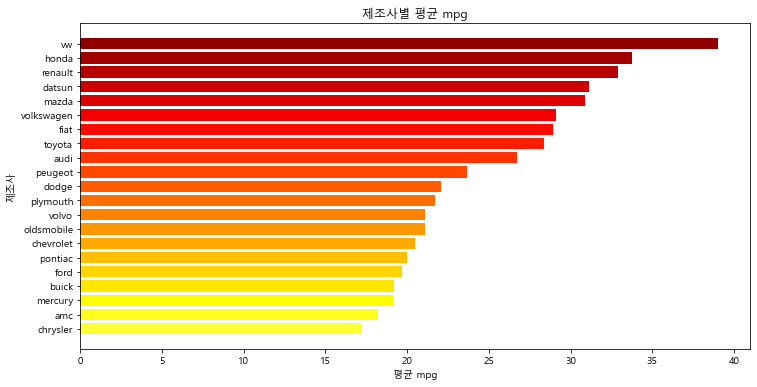

In [19]:
df = mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer').sort_values(by='mpg')
y = np.arange(len(df.mpg))
category_colors = plt.get_cmap('hot')(np.linspace(0.8, 0.2, len(df.mpg)))
plt.figure(figsize=(12,6))
plt.barh(y, df.mpg, color=category_colors)
plt.yticks(y, df.index)
plt.xlabel('평균 mpg'); plt.ylabel('제조사')
plt.title('제조사별 평균 mpg')
plt.show()